In [ ]:
import pandas as pd

In [ ]:
df=pd.read_table('/content/Restaurant_Reviews.tsv')

In [ ]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
x=df['Review'].values

In [ ]:
y=df['Liked'].values

In [ ]:
df['Liked']

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [ ]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

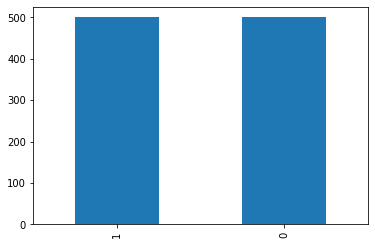

In [ ]:
df['Liked'].value_counts().plot(kind='bar')

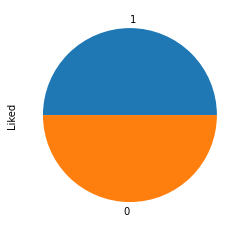

In [ ]:
df['Liked'].value_counts().plot(kind='pie')

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape

(750,)

In [ ]:
y_train.shape

(750,)

In [ ]:
x_test.shape

(250,)

In [ ]:
y_test.shape

(250,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #count vectorizer
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [ ]:
x_train_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
 # from sklearn.linear_model import LogisticRegression
 # model = LogisticRegression()
 # model.fit(x_train_vect,y_train)
# y_pred = model.predict(x_test_vect)
# accuracy_score(y_pred,y_test)

In [ ]:
from sklearn.svm import SVC 

In [ ]:
model1 = SVC() 

In [ ]:
model1.fit(x_train_vect,y_train)

SVC()

In [ ]:
y_pred1 = model1.predict(x_test_vect)
y_pred1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score #PIPELINE
accuracy_score(y_pred1,y_test)

0.72

In [ ]:
from sklearn.pipeline import make_pipeline 

model2 = make_pipeline(CountVectorizer(),SVC())

model2.fit(x_train,y_train) 

y_pred2 = model2.predict(x_test)
y_pred2

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred2,y_test)

0.792

In [ ]:
from sklearn.naive_bayes import MultinomialNB #NAVIE BAYES

In [ ]:
model3 = MultinomialNB() 

In [ ]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [ ]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.744

In [ ]:
from sklearn.pipeline import make_pipeline  #PIPELINE WITH MULTINOMIALNB

model4 = make_pipeline(CountVectorizer(),MultinomialNB())

model4.fit(x_train,y_train) 

y_pred4 = model4.predict(x_test)
y_pred4

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred4,y_test)

0.784

In [ ]:
# # ACCURACY SCORES FOR ALL 4 MODELS 
# SVC                       - 0.72
# SVC pipeline              - 0.792
# MultinomialNB             - 0.744
# MultinomialNB pipeline    - 0.784

In [ ]:
import joblib 
joblib.dump(model4,'0-1') #create a file for the best model to be used for predictions

['0-1']

In [ ]:
import joblib 
text_model = joblib.load('0-1')   #reloading the created joblib model for predictions 
text_model

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
text_model.predict(["Free entry to the concert"]) # we are using joblib model to predict the output

array([1])

In [1]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import streamlit as st

2022-07-07 15:07:43.731 INFO    numexpr.utils: NumExpr defaulting to 2 threads.


In [3]:
%%writefile app.py 
import streamlit as st 
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# Add a title to the webapp
st.title("IRIS FLOWER CLASSIFICATION")

# Load the data (similar to creating a dataframe)
var = load_iris()

#divide data into input and output 
x = var.data     #input
y = var.target   #output 

# Import the KNN model 
model = KNeighborsClassifier(n_neighbors=13)

#Fit the model 
model.fit(x,y)

# Taking inputs for setting the min and max range inside the slider
xmin = np.min(x,axis = 0)
xmax = np.max(x,axis = 0)

#slider creation 
sepal_length  = st.slider("Sepal Length",float(xmin[0]),float(xmax[0])) 
sepal_width   = st.slider("Sepal Width",float(xmin[1]),float(xmax[1]))
petal_length  = st.slider("Petal Length",float(xmin[2]),float(xmax[2]))
petal_width   = st.slider("Petal Width",float(xmin[3]),float(xmax[3]))

#Predict the output 
y_pred = model.predict([[sepal_length,sepal_width,petal_length,petal_width]])

# print the predicted output 
op = ['Iris-setosa','Iris-versicolor','Iris-virginica']
st.title(op[y_pred[0]]) 

Writing app.py


In [5]:
!streamlit run app.py & npx localtunnel --port 8501  

2022-07-07 15:11:19.228 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 2.41s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.82.172.217:8501

your url is: https://lazy-jeans-hammer-34-82-172-217.loca.lt
MAJOR
JUNE
  Stopping...
^C


In [6]:
#SENTIMENT ANALYSIS
#Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations.
#Creative use of advanced artificial intelligence techniques can be an effective tool for doing in-depth research.
#Sentiment Analysis is the most common text classification tool that analyses an incoming message and tells whether the underlying sentiment is positive, negative our neutral.
#Sentiment analysis serves as a fundamental aspect of dealing with customers on online portals and websites for the companies.
#It is an easy way to understand and analyze public reception and perception of different ideas and concepts, or a newly launched product, maybe an event or a government policy.
# Natural language processing (NLP) is a superclass of sentiment analysis that deals with understanding all kinds of things from a piece of text.
#NLP is the branch of AI dealing with texts, giving machines the ability to understand and derive from the text.
#The example of sentimental analysis : Simple classification of text into positive, negative or neutral.
# Sentiment analysis is easy to implement, but lacks flexibility and does not account for context.
#Algorithms in this category include support vector machine, linear regression, rnn, and its types.

In [7]:
#TWITTER SENTIMENTS
#Tweepy: tweepy is the python client for the official Twitter API
#pip install tweepy
#TextBlob: textblob is the python library for processing textual data
#pip install textblob
#In order to fetch tweets through Twitter API, one needs to register an App through their twitter account.
#sample outputs are:Positive tweets percentage: 22 %Negative tweets percentage: 15 %
# 3 steps used in twitter sentiments are:
#   Authorize twitter API client.
#   Make a GET request to Twitter API to fetch tweets for a particular query.
#   Parse the tweets. Classify each tweet as positive, negative or neutral.
#To fetch tweets we use function:fetched_tweets = self.api.search(q = query, count = count)
#we use sentiment.polarity method of TextBlob class to get the polarity of tweet between -1 to 1.(If polarity>0 then positive)(If polarity<0 then negative)(If polarity=0 then neutral)
